##### 1.	Download the dataset here: https://www.kaggle.com/sohier/calcofi and create one DataFrame for the bottle file and another for the cast file. Perform preprocessing on this dataset. You do not need to do all six types of preprocessing we discussed. For this dataset, 2-3 is all you need. 

In [1]:
# Initial Set-Up
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [2]:
# Create bottle df
bottle = pd.read_csv('bottle.csv')
bottle_df = pd.DataFrame(bottle)
bottle_df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Examine bottle df features
print(bottle_df.shape)
bottle_df.columns

(864863, 74)


Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

In [4]:
# Identify missing data for bottle_df
bottle_df.isnull().sum()

# Drop (24) features with more than 80% null values
pct_null = bottle_df.isnull().sum()/len (bottle_df)
missing_features = pct_null[pct_null > 0.80].index 
bottle_df.drop(missing_features, axis=1, inplace=True)
bottle_df.shape

(864863, 50)

In [5]:
# Search for categorical features in the dataframe
print(bottle_df.select_dtypes('object'))

# Drop (2) categorical features
num_bottle_df=bottle_df.drop(['Sta_ID', 'Depth_ID'], axis = 1)
num_bottle_df.head()

             Sta_ID                                Depth_ID
0       054.0 056.0  19-4903CR-HY-060-0930-05400560-0000A-3
1       054.0 056.0  19-4903CR-HY-060-0930-05400560-0008A-3
2       054.0 056.0  19-4903CR-HY-060-0930-05400560-0010A-7
3       054.0 056.0  19-4903CR-HY-060-0930-05400560-0019A-3
4       054.0 056.0  19-4903CR-HY-060-0930-05400560-0020A-7
...             ...                                     ...
864858  093.4 026.4  20-1611SR-MX-310-2239-09340264-0000A-7
864859  093.4 026.4  20-1611SR-MX-310-2239-09340264-0002A-3
864860  093.4 026.4  20-1611SR-MX-310-2239-09340264-0005A-3
864861  093.4 026.4  20-1611SR-MX-310-2239-09340264-0010A-3
864862  093.4 026.4  20-1611SR-MX-310-2239-09340264-0015A-3

[864863 rows x 2 columns]


,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,...,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_CHLA,R_PHAEO,R_PRES
0,1,1,0,10.50,33.440,NaN,25.649,NaN,NaN,3,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,2,8,10.46,33.440,NaN,25.656,NaN,NaN,3,...,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
2,1,3,10,10.46,33.437,NaN,25.654,NaN,NaN,7,...,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
3,1,4,19,10.45,33.420,NaN,25.643,NaN,NaN,3,...,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
4,1,5,20,10.45,33.421,NaN,25.643,NaN,NaN,7,...,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20


In [6]:
# Impute missing data for remaining features
columns = num_bottle_df.columns
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(num_bottle_df)
imp_bottle = imp.transform(num_bottle_df)
filled_bottle_df = pd.DataFrame(imp_bottle)
filled_bottle_df.columns = columns
filled_bottle_df.head()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,...,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_CHLA,R_PHAEO,R_PRES
0,1.0,1.0,0.0,10.50,33.440,3.392468,25.649,57.103779,148.808694,3.0,...,0.00,3.392498,57.19294,26.606862,1.564736,17.302188,0.042336,0.450225,0.198599,0.0
1,1.0,2.0,8.0,10.46,33.440,3.392468,25.656,57.103779,148.808694,3.0,...,0.01,3.392498,57.19294,26.606862,1.564736,17.302188,0.042336,0.450225,0.198599,8.0
2,1.0,3.0,10.0,10.46,33.437,3.392468,25.654,57.103779,148.808694,7.0,...,0.02,3.392498,57.19294,26.606862,1.564736,17.302188,0.042336,0.450225,0.198599,10.0
3,1.0,4.0,19.0,10.45,33.420,3.392468,25.643,57.103779,148.808694,3.0,...,0.04,3.392498,57.19294,26.606862,1.564736,17.302188,0.042336,0.450225,0.198599,19.0
4,1.0,5.0,20.0,10.45,33.421,3.392468,25.643,57.103779,148.808694,7.0,...,0.04,3.392498,57.19294,26.606862,1.564736,17.302188,0.042336,0.450225,0.198599,20.0


In [7]:
# Normalize/Standardize
features = filled_bottle_df.columns+'_scaled'
scaler = StandardScaler().fit(filled_bottle_df)
scaled_bottle = scaler.transform(filled_bottle_df)
scaled_bottle_df=pd.DataFrame(scaled_bottle)
scaled_bottle_df.columns = features
scaled_bottle_df.head()

,Cst_Cnt_scaled,Btl_Cnt_scaled,Depthm_scaled,T_degC_scaled,Salnty_scaled,O2ml_L_scaled,STheta_scaled,O2Sat_scaled,Oxy_µmol/Kg_scaled,RecInd_scaled,...,R_DYNHT_scaled,R_O2_scaled,R_O2Sat_scaled,R_SIO3_scaled,R_PO4_scaled,R_NO3_scaled,R_NO2_scaled,R_CHLA_scaled,R_PHAEO_scaled,R_PRES_scaled
0,-1.673458,-1.732049,-0.717709,-0.071067,-0.891606,-4.774785e-16,-0.150570,4.381252e-16,-3.604034e-16,-0.905640,...,-1.161028,2.387376e-16,2.184084e-16,4.016355e-16,0.0,1.170197e-15,1.065868e-16,-5.399806e-16,8.665828e-16,-0.714951
1,-1.673458,-1.732045,-0.692396,-0.080552,-0.891606,-4.774785e-16,-0.144385,4.381252e-16,-3.604034e-16,-0.905640,...,-1.134138,2.387376e-16,2.184084e-16,4.016355e-16,0.0,1.170197e-15,1.065868e-16,-5.399806e-16,8.665828e-16,-0.689908
2,-1.673458,-1.732041,-0.686068,-0.080552,-0.898287,-4.774785e-16,-0.146152,4.381252e-16,-3.604034e-16,1.224936,...,-1.107247,2.387376e-16,2.184084e-16,4.016355e-16,0.0,1.170197e-15,1.065868e-16,-5.399806e-16,8.665828e-16,-0.683648
3,-1.673458,-1.732037,-0.657592,-0.082924,-0.936148,-4.774785e-16,-0.155872,4.381252e-16,-3.604034e-16,-0.905640,...,-1.053467,2.387376e-16,2.184084e-16,4.016355e-16,0.0,1.170197e-15,1.065868e-16,-5.399806e-16,8.665828e-16,-0.655475
4,-1.673458,-1.732033,-0.654428,-0.082924,-0.933920,-4.774785e-16,-0.155872,4.381252e-16,-3.604034e-16,1.224936,...,-1.053467,2.387376e-16,2.184084e-16,4.016355e-16,0.0,1.170197e-15,1.065868e-16,-5.399806e-16,8.665828e-16,-0.652344


##### 2.	Create a correlation matrix to see how the features are correlated. Describe your findings. Pay particular attention to what is correlated with water temperature. 

In [8]:
corr_mat = scaled_bottle_df.corr()
print(corr_mat)

                    Cst_Cnt_scaled  Btl_Cnt_scaled  Depthm_scaled  \
Cst_Cnt_scaled            1.000000        0.999345      -0.162222   
Btl_Cnt_scaled            0.999345        1.000000      -0.161617   
Depthm_scaled            -0.162222       -0.161617       1.000000   
T_degC_scaled             0.088783        0.089581      -0.678628   
Salnty_scaled            -0.189893       -0.187243       0.543326   
O2ml_L_scaled             0.146288        0.144570      -0.532769   
STheta_scaled            -0.085748       -0.085408       0.551689   
O2Sat_scaled              0.122815        0.121268      -0.512682   
Oxy_µmol/Kg_scaled        0.132695        0.130957      -0.507193   
RecInd_scaled            -0.100142       -0.100828       0.082316   
T_prec_scaled             0.067562        0.062489       0.019348   
S_prec_scaled             0.439404        0.438148       0.005630   
P_qual_scaled            -0.001985       -0.002021       0.000736   
O_qual_scaled            -0.225926

In [16]:
# Search for strong correlations

for i in range(len(corr_mat)):
    try:
        if  corr_mat['T_degC_scaled'][i]!= 1 and np.abs(corr_mat['T_degC_scaled'][i])>0.7:
            print(corr_mat.index[i])
            print(corr_mat['T_degC_scaled'][i])
    except Exception as e:
        print(e)

O2ml_L_scaled
0.7127312543672776
STheta_scaled
-0.8042948597259464
O2Sat_scaled
0.7451306841866665
R_TEMP_scaled
0.9999999906951362
R_POTEMP_scaled
0.9735817769754369
R_SIGMA_scaled
-0.836170462223128
R_SVA_scaled
0.9351548294971143
R_DYNHT_scaled
-0.774223786742134
R_O2_scaled
0.7127314811245827
R_O2Sat_scaled
0.7436826705421935


Negatively correlated: 
STheta = potential density of water
R_SIGMA = reported potential density of water
R_DYNHT = reported dynamic height 

Positively Correlated:
O2ml_L = Milliliters of dissolved oxygen per Liter seawater
02Sat = Oxygen Saturation
R_TEMP = Reported Temperature
R_POTEMP = Reported Potential Temperature
R_SVA = Reported Specific Volume Anomaly
R_02 = Reported milliliters of oxygen per liter of seawater
R_O2Sat = Reported Oxygen Saturation

The density and dynamic height of water is negatively correlated to temperature.  This is expected since as the temperature lowers, water expands to ice (therefore its density and dynamic height increases).

The oxygenation of the water has a strong correlation to temperature.  This means that as the temperature of the water increases, so does the level of oxygen saturation in the water.  I am curious about the "Reported Specific Volume Anomaly," but I wasn't able to dig up more information about it.  It is another feature that shows a strong correlation to the water's temperature.

Since salinity is mentioned in question 3, I noted that the correlation between water temp and salinity is weak, at -0.49.

##### 3.	Perform linear regression on the dataset to see if you can predict water temperature based on salinity. 

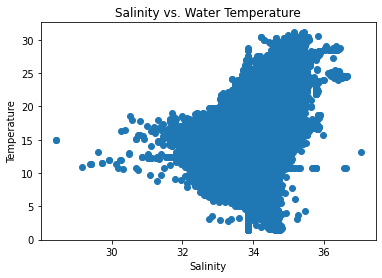

In [17]:
# Visualize the data to check for linear relationship.  There appears to be an upward linear trend.
plt.scatter(filled_bottle_df.Salnty, filled_bottle_df.T_degC)
plt.title('Salinity vs. Water Temperature')
plt.xlabel('Salinity')
plt.ylabel('Temperature')
plt.show()

<AxesSubplot:>

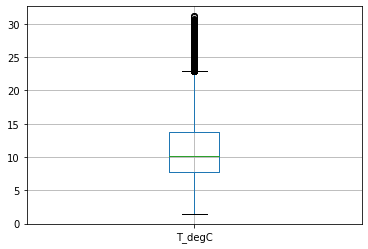

In [18]:
# Identify outliers.  -- There are MANY!
filled_bottle_df.boxplot(column=['T_degC'])

In [19]:
# Remove outliers.

#find Q1, Q3, and interquartile range for T_degC
Q1 = filled_bottle_df.T_degC.quantile(q=.25)
Q3 = filled_bottle_df.T_degC.quantile(q=.75)
IQR = filled_bottle_df.T_degC.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
temp_no_outliers = filled_bottle_df[~(filled_bottle_df.T_degC > (Q3+1.5*IQR))]

#find how many rows are left in the dataframe 
print(temp_no_outliers.shape)

(648684, 48)


<AxesSubplot:>

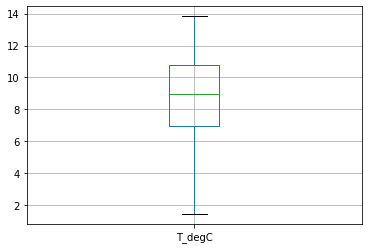

In [20]:
# Visualizing without outliers (to check).
temp_no_outliers.boxplot(column=['T_degC'])

In [21]:
# Create Linear Regression model
X = np.array(temp_no_outliers.Salnty).reshape(-1,1)
y = temp_no_outliers.T_degC

#add constant to predictor variables
X = sm.add_constant(X)

#fit linear regression model
lin_reg = sm.OLS(y, X).fit()

#view model summary
print(lin_reg.summary())


                            OLS Regression Results                            
Dep. Variable:                 T_degC   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                 5.615e+05
Date:                Sun, 02 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:43:16   Log-Likelihood:            -1.3515e+06
No. Observations:              648684   AIC:                         2.703e+06
Df Residuals:                  648682   BIC:                         2.703e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        157.1698      0.198    794.104      0.0

Based on the results, the equation of the model is:

T_degC = -4.3715 * Salnty + 157.1698

##### 4.	Find your mean squared error and R2 values. Be sure to indicate what these tell you. You can import these from sklearn.metrics . 

I used OLS for question 3, but in order to calculate MSE and R2 I need to use train_test_split (which you refer to later in the assignment).  So rather than redoing question 3, I am using train_test_split here.

In [48]:
# Create a training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# fit the model to the training set
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Calculate the predicted value for test dataset
y_pred = lin_reg.predict(X_test)

# Compute 5-fold cross-validation scores
cv_scores = cross_val_score(lin_reg, X, y, cv=5)
print("5-Fold CV Scores: ", cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

5-Fold CV Scores:  [0.26899279 0.18620642 0.42343525 0.67817388 0.71357944]
Average 5-Fold CV Score: 0.45407755488780815


In [49]:
# Mean Squared Error
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_lin_pred),
                mean_squared_error(y_test, y_test_lin_pred)))

# R-Squared
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_lin_pred),
                r2_score(y_test, y_test_lin_pred)))

MSE train: 3.776, test: 3.783
R^2 train: 0.464, test: 0.463


The Mean Squared Error is calculated by taking the average of the sum of the squares of all of the vertical distances (or differences) between the linear regression model and the data points themselves. Because of this, it will always be positive.  Since we want to minimize these vertical differences represent error on the part of our model, we want to minimize them.  Therefore a MSE value of 0 is our goal, since a perfectly fit model would have no error. 

With regard to my model, the MSE is 3.78.  This is not close to zero, which implies that my model does not fit the data well.

The R2 value is a ratio comparing the sum of squares of the vertical distances between the linear regression model and the data points themselves (the residuals) and the sum of the squares of the vertical distances between the average value of the data points and the data points themselves.  In an ideal world, these sums of squares would be equal.  So an R2 value of 1 is our goal.  R2 values will always lie between 0 and 1 because of the nature of the ratio they represent.

With regard to my model, the R2 is 0.46.  This is, once again, not a good sign. So this model is definitely not a good fit for this data.

##### 5.	Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the predicted temperature values. 

My plot shows two different scatter plots.  The yellow one includes the outliers, and the green one does not.  Honestly, this data set is perplexing to me.  My initial scatter plot appeared to have an upward trend.  The correlation value of -0.49 tells me that there is actually a downward trend, albeit a weak relationship.  It just seems that this dataset is more complicated than a simple linear model can address.

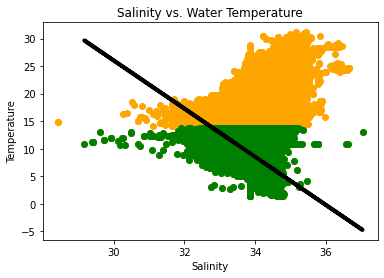

In [50]:
# Plot scatter plot
plt.scatter(filled_bottle_df.Salnty, filled_bottle_df.T_degC, c = 'orange')

plt.scatter(temp_no_outliers.Salnty, temp_no_outliers.T_degC, c = 'green')

# Plot regression line
temp = -4.3715  * temp_no_outliers.Salnty + 157.1698
fig = plt.plot(temp_no_outliers.Salnty, temp, c = 'black', lw=4, label='regression line')


plt.title('Salinity vs. Water Temperature')
plt.xlabel('Salinity')
plt.ylabel('Temperature')
plt.show()

##### 6.	Do some research on polynomial regression. Describe what it is any how it works in markdown. This article is useful https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/ 

Polynomial regression creates a model that is based on powers of x beyond one.  This allows greater scope for modeling, since polynomials with a degree greater than one create curves.  Not all datasets will have a linear relationship, so using polynomial regression gives us the option to fit one of many possible polynomial curves to a dataset instead of being stuck using a line.

Polynomial regression works by exploring polynomial curves from degree 1 to some higher integer n.  It takes each feature in a dataset and creates new columns whereby the value is raised to a power of 2, 3, 4, and so on until reaching n.  This expands the number of features in the dataset VERY quickly, so running polynomial regressions higher than 3 are not practical unless you're using a very small dataset.  After creating these new feature columns, the regression model searches for the best fit among all of the combinations among the feature columns.

##### 7.	Perform polynomial regression on this same dataset. Train and validate your model as you did when you used linear regression. Mean squared error and R2 both apply here. 

In [86]:
# Create a training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a model using Training dataset
poly_reg = PolynomialFeatures(degree=3)
poly_X_train = poly_reg.fit_transform(X_train)
poly_X_test = poly_reg.fit_transform(X_test)

# Create new model using polynomial data
lin_reg2 = LinearRegression()
lin_reg2.fit(poly_X_train,y_train)

# I wish I knew how to unpack these coefficients.  I would like to understand how they fit into a polynomial regression 
# equation with degree 3.  They are essentially 0, 0, 1098, 0, 1098, -49, 0, 1098, -49, and 1.   A polynomial of degree 3 has a 
# maximum 4 terms:  an x^3-term, an x^2-term, an x-term, and a constant.  How do these 10 coefficients tie in to the polynomial
# equation for the regression?
print('Coefficients: ', lin_reg2.coef_)

# Calculate the predicted value for training and test dataset
y_train_poly_pred = lin_reg2.predict(poly_X_train)
y_test_poly_pred = lin_reg2.predict(poly_X_test)
#y_poly_pred = lin_reg2.predict(temp_poly_X)
print("Accuracy Score: ", lin_reg2.score(poly_X_test,y_test))

# Compute 5-fold cross-validation scores
cv_scores = cross_val_score(lin_reg2, X, y, cv=5)
print("5-Fold CV Scores: ", cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

Coefficients:  [ 0.00000000e+00  4.12034608e-10  1.09777379e+03 -4.54747351e-13
  1.09777379e+03 -4.89478611e+01  7.47173597e-35  1.09777379e+03
 -4.89478611e+01  9.68547405e-01]
Accuracy Score:  0.4882954974464958
5-Fold CV Scores:  [0.26899279 0.18620642 0.42343525 0.67817388 0.71357944]
Average 5-Fold CV Score: 0.45407755488780815


In [81]:
# Mean Squared Error
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_poly_pred),
                mean_squared_error(y_test, y_test_poly_pred)))

# R-Squared
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_poly_pred),
                r2_score(y_test, y_test_poly_pred)))

MSE train: 3.639, test: 3.605
R^2 train: 0.484, test: 0.488


The MSE is closer to 0 and the R2 score is closer to 1 for this polynomial regression model than it is for the linear regression.  So by all measures, the polynomial regression model is a better fit for the data.

##### 8.	Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the polynomial regression predicted temperature values. The resulting trend line should be curved. 

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

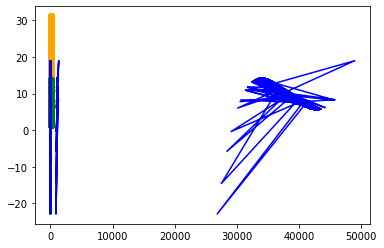

In [89]:
# Plot scatter plot
plt.scatter(filled_bottle_df.Salnty, filled_bottle_df.T_degC, c = 'orange')

plt.scatter(temp_no_outliers.Salnty, temp_no_outliers.T_degC, c = 'green')

# I need to plot the points in order from min(poly_X_test) to max(poly_X_test), while keeping the ordered pairs intact.
#sorted_zip = sorted(zip(poly_X_test, y_test_poly_pred))
# Now I need to separate them back into two variables for the sake of the plot.
#poly_X_test, y_poly_pred = zip(*sorted_zip)

plt.plot(poly_X_test, y_test_poly_pred, color = 'blue')

# Plot regression line
X_grid = np.arange(min(temp_poly_X), max(temp_poly_X), 0.1)
X_grid= X_grid.reshape(len(X_grid), 1)
temp_poly_X_grid = poly_reg.fit_transform(X_grid)

plt.plot(X_grid, lin_reg2.predict(temp_poly_X_grid),color='blue')

plt.title('Salinity vs. Water Temperature')
plt.xlabel('Salinity')
plt.ylabel('Temperature')
plt.show()

Unfortunately, I'm going to have to leave this one here when it's clearly very wrong.  I have been troubleshooting errors for a very long time now with no end in sight.  :(

## DataCamp

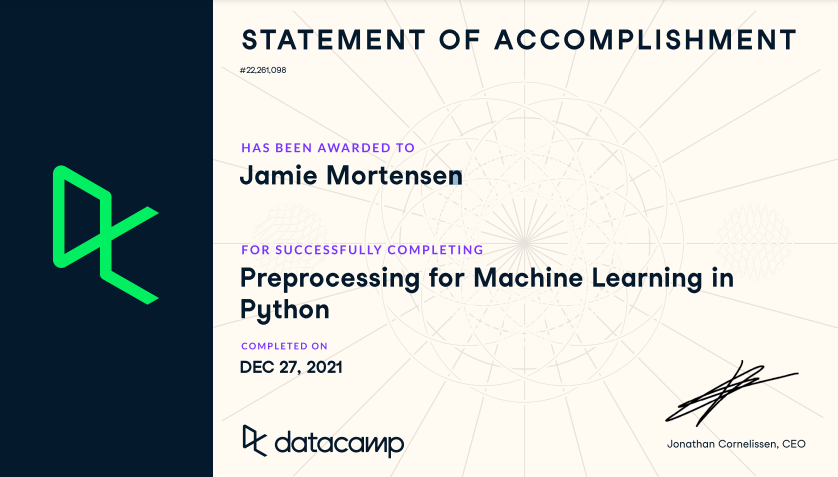

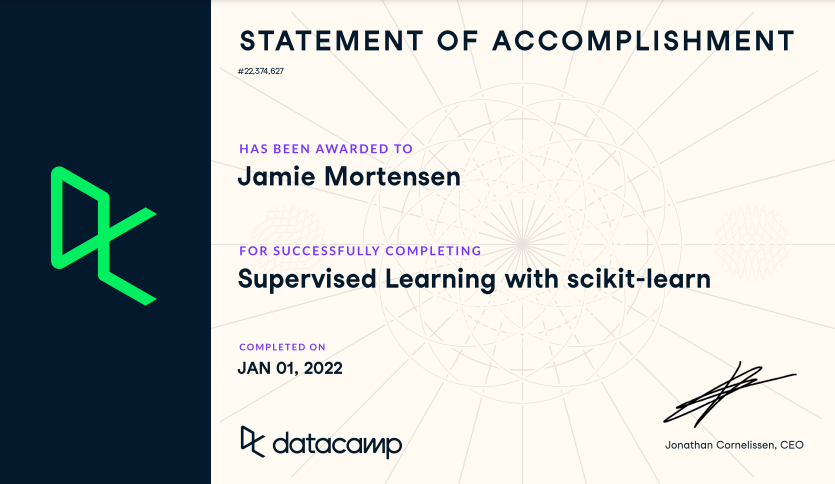